# python verze pyplot_fig, kde plotuju grafy tykajici se pohybu iontu

In [1]:
# Setup some Jupyter env features
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pandas import DataFrame

In [2]:
# plot dat
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams

rcParams["font.size"] = 16
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "true";
rc('text', usetex=True)

my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

In [13]:
# from julia import Main
from julia.api import Julia
jl = Julia(compiled_modules=False)

from julia import Main
# jl = Julia()

Main.include("get_mathi_traj.jl")

<PyCall.jlwrap get_E_kin_1D>

In [121]:
## vypocet pohybu iontu
import numpy as np
# parametry pasti
Vrf = 500  # napeti radialnich elektrod [V]
Udc = 500  # napeti axialnich elektrod [V]
Omega = 2*np.pi * 30e6 # budici frekvence pasti [Hz]

T = 0.5e-3 # teplota iontu
E_ext = [1,2,0]
# delta_phi = [0,1e-4,0] # fazovy rozdil protejsich radialnich elektrod [x, y, 0]
delta_phi = [0,0,0] # fazovy rozdil protejsich radialnich elektrod [x, y, 0]
# E_ext = [0,0,0]
# delta_phi = [0,0,0] # fazovy rozdil protejsich radialnich elektrod [x, y, 0]
phi = [0,0,0]

# casovy rozsah
# tspan = np.linspace(0, 2*np.pi/Omega * 10, 601)  # drive freq.
tspan = np.linspace(0, 2*5.56893297e-07, 10001)   # sekularni freq. pozor, kvuli tomuto radku muzou byt grafy 'zubate'
# analyticke reseni
(u_sec, u_IMM, u_EMM,u_EMM_phase, Per_sec, avg_E_kin_an) = Main.get_mathi_traj(Vrf, Udc, Omega, T, E_ext,
    delta_phi, phi, tspan, div=True, sym_type=False)

u = u_sec + u_IMM + u_EMM + u_EMM_phase # celkovy pohyb iontu

(E_kin_sec, T_kin_sec) = Main.get_E_kin_1D(u_sec[:,2-1])
(E_kin_IMM, T_kin_IMM) = Main.get_E_kin_1D(u_IMM[:,2-1])
(E_kin_EMM, T_kin_EMM) = Main.get_E_kin_1D(u_EMM[:,2-1])
(E_kin_EMM_phase, T_kin_EMM_phase) = Main.get_E_kin_1D(u_EMM_phase[:,2-1]);

#mean(T_kin_sec) * 1/2 * convert(Float32,BoltzmannConstant/(1u"J*K^-1")/ convert(Float32, ElementaryCharge/(1u"C"))) * 1e6
print("persec = ",Per_sec)
print("\nmean T_kin_sec= ",np.mean(E_kin_sec))
print("\nmean T_kin_IMM= ",np.mean(E_kin_IMM))

avg_E_kin_an

persec =  [5.56893297e-07 5.56893297e-07 1.17807942e-06]

mean T_kin_sec=  2.1541179045469395e-08

mean T_kin_IMM=  2.4135740631253738e-08


[array([2.15433332e-08, 2.15433332e-08, 2.15433332e-08]),
 array([2.39503423e-08, 2.39503423e-08, 0.00000000e+00]),
 array([1.05330557e-08, 4.21322229e-08, 0.00000000e+00]),
 array([0., 0., 0.])]

[(0, 1.01)]

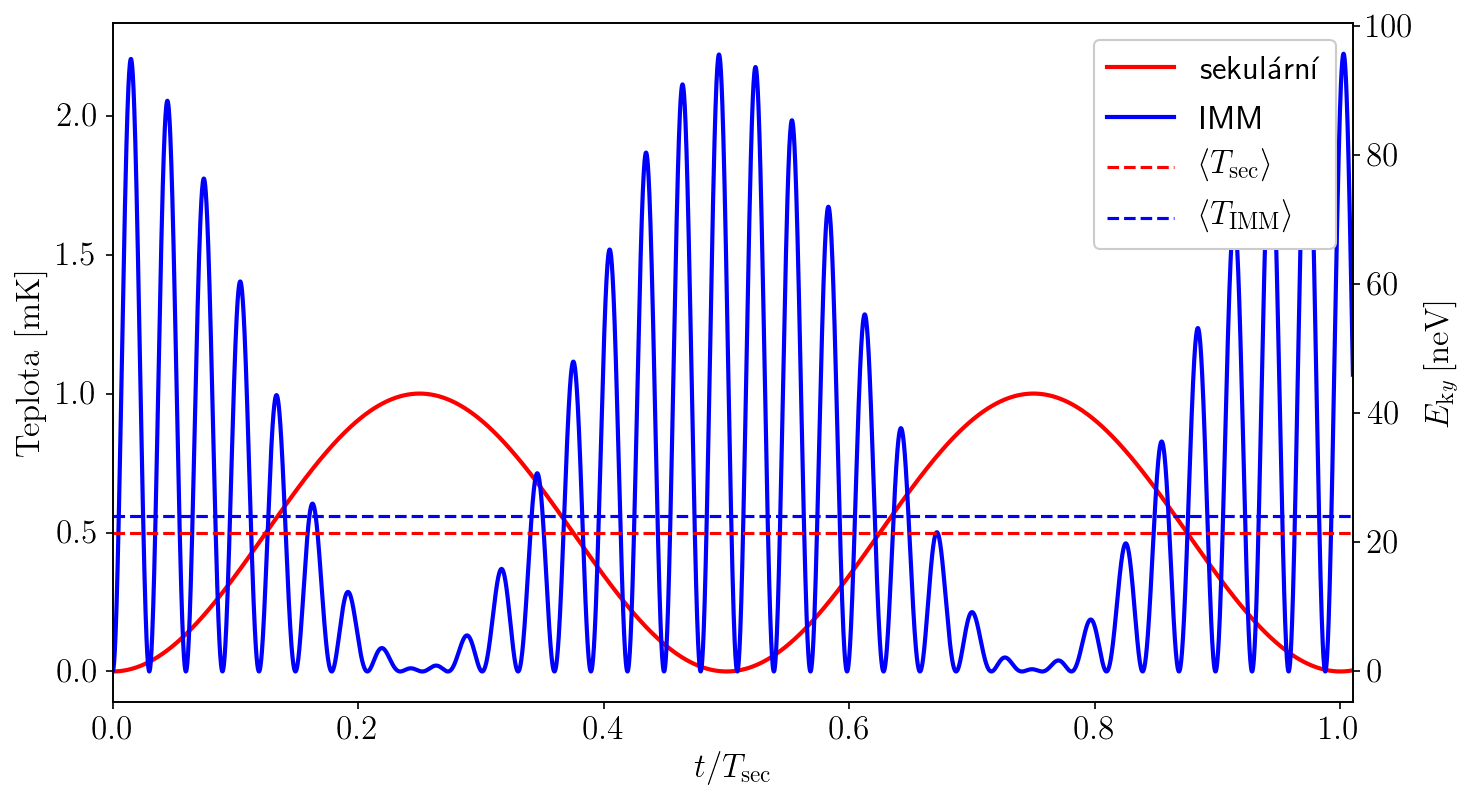

In [122]:
## plot sec + IMM
k_B = 1.38064852e-23
e = 1.60217662e-19

yscale = 1/2 * k_B/ e * 1e6 # skalovani
# druhe osy do neV

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

plt.plot(tspan/Per_sec[1], T_kin_sec * 1e3, linewidth=2.0, label=r"sekulární", color="red")
plt.plot(tspan/Per_sec[1], T_kin_IMM * 1e3, linewidth=2.0, label=r"IMM", color="blue")
plt.axhline(np.mean(T_kin_sec)*1e3, linestyle="--", label=r"$ \left< T_{\rm{sec}} \right>$", color="red")
plt.axhline(np.mean(T_kin_IMM)*1e3, linestyle="--", label=r"$ \left< T_{\rm{IMM}} \right>$", color="blue")
plt.legend(loc=1, framealpha=1)
plt.xlabel(r"$ t/T_{\rm{sec}} $")
plt.ylabel(r"$\rm{Teplota \,\,[mK]}$")
x=plt.gca()
x2 = x.twinx()
x2.set_ylabel(r"$E_{\rm{k}\it{y}} \, \rm{[neV]}$")
x2.set(ylim=(x.get_ylim()[0]* yscale, x.get_ylim()[1] * yscale ) )
x.set(xlim=(0, 1.01))

# plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/ion_temperature_plots/temp_vs_t_sec_IMM_latex.svg", bbox_inches="tight")

[(0, 0.165)]

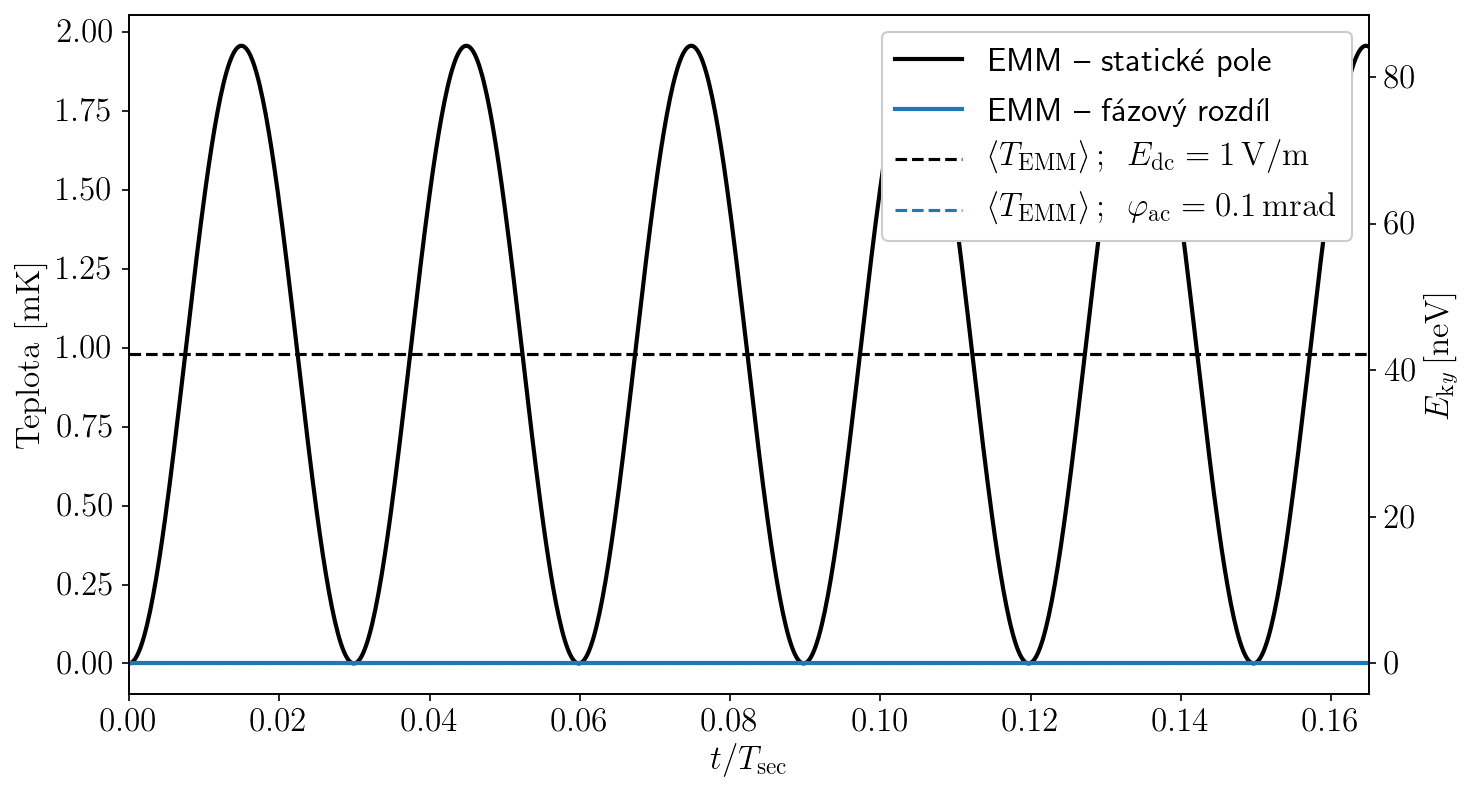

In [123]:
plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

plt.plot(tspan/Per_sec[1], T_kin_EMM * 1e3, linewidth=2.0, label=r"EMM -- statické pole", color="black")
plt.plot(tspan/Per_sec[1], T_kin_EMM_phase * 1e3, linewidth=2.0, label=r"EMM -- fázový rozdíl")
plt.axhline(np.mean(T_kin_EMM)*1e3, linestyle="--", label=r"$ \left< T_{\rm{EMM}} \right>;\,\,\, E_{\rm{dc}} = 1 \, \rm{V/m} $", color="black")
plt.axhline(np.mean(T_kin_EMM_phase)*1e3, linestyle="--", label=r"$ \left< T_{\rm{EMM}} \right>;\,\,\, \varphi_{\rm{ac}} = 0.1 \, \rm{mrad}  $")
plt.legend(loc=1, framealpha=1)
plt.xlabel(r"$ t/T_{\rm{sec}} $")
plt.ylabel(r"$ \rm{Teplota \,\,[mK]}$")
x=plt.gca()
x2 = x.twinx()
x2.set_ylabel(r"$E_{\rm{k}\it{y}} \, \rm{[neV]}$")
x2.set(ylim=(x.get_ylim()[0]* yscale, x.get_ylim()[1] * yscale ) )
x.set(xlim=(0, 0.165))
# plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/ion_temperature_plots/temp_vs_t_EMM_EMMphase_Vrf500_1mrad_latex.svg", bbox_inches="tight")

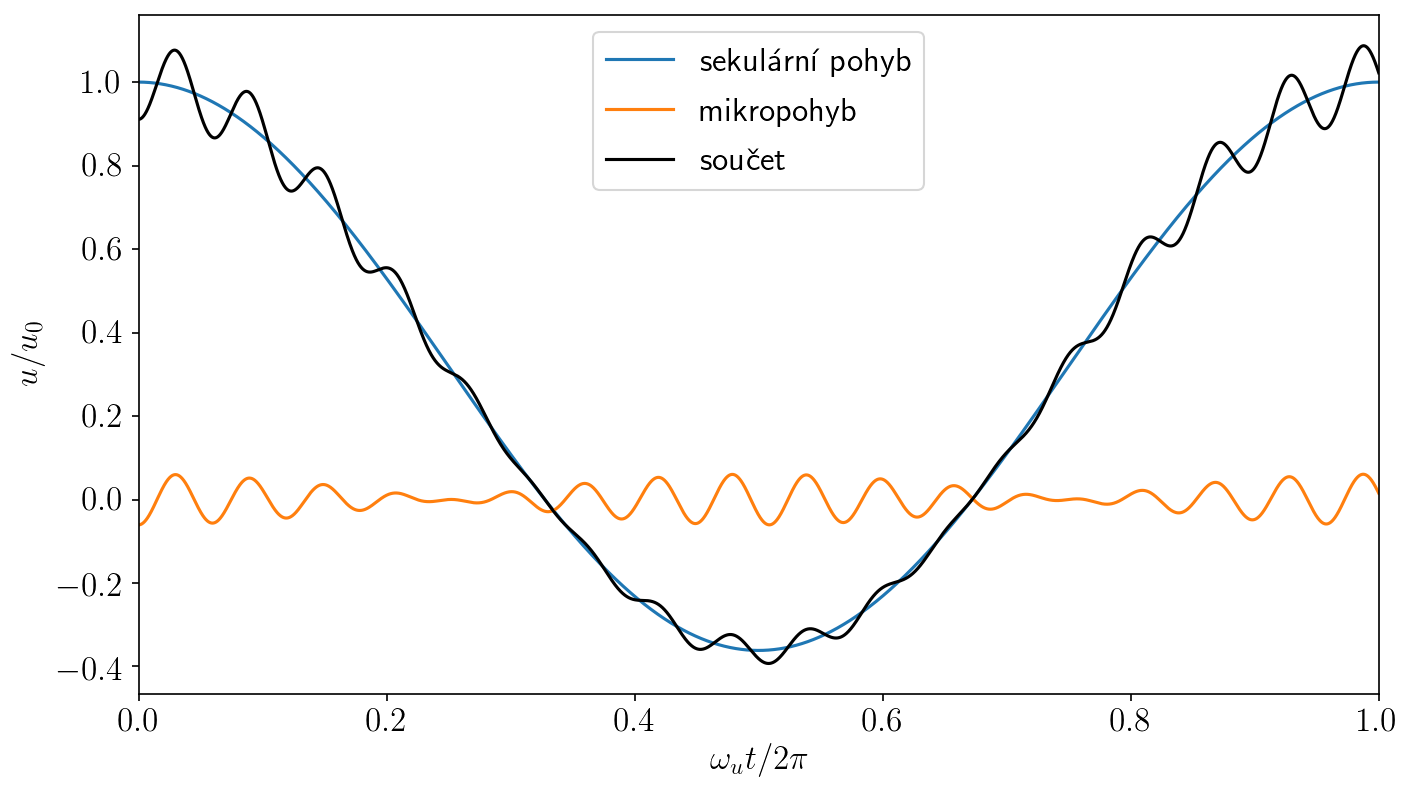

In [124]:
plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

plt.plot(tspan/Per_sec[1], u_sec[:,3]/u_sec[:,3].max(), label=r"sekulární pohyb")

plt.plot(tspan/Per_sec[1], u_IMM[:,3]/u_sec[:,3].max(), label=r"mikropohyb")

plt.plot(tspan/Per_sec[1], u[:,3]/u_sec[:,3].max(), color="black", label=r"součet")

plt.xlim(0,1)

## popisky
plt.xlabel(r"$\omega_u t/2 \pi$")
plt.ylabel(r"$u/u_0$")
plt.legend()

# plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/ion_temperature_plots/resenimathi_xt_python_v2.svg", bbox_inches="tight")

## overeni vypoctu frekvencnich shiftu

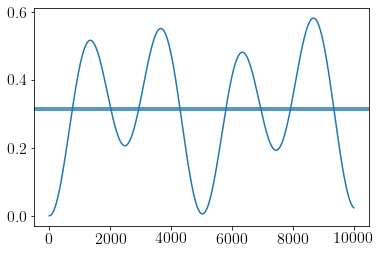

In [125]:
k_B = 1.3806e-23
m = 40* 1.6605e-27

v_sec_2 = np.sum( u_sec[:,:3]**2, axis=1 )

plt.plot(v_sec_2)
plt.axhline(3*k_B*T/(m))
plt.axhline(np.mean(v_sec_2) )

sekularni slozka vypada ok

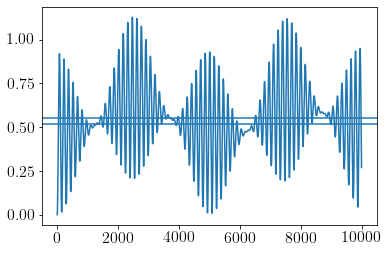

In [126]:
v_IMM_2 = np.sum( u_IMM[:,:3]**2, axis=1 )

plt.plot(v_sec_2 + v_IMM_2)
plt.axhline(5*k_B*T/(m))
plt.axhline(np.mean(v_IMM_2 + v_sec_2) )

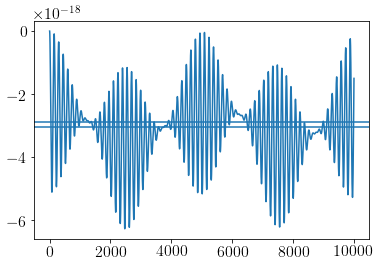

In [127]:
## primo hodnota relativniho shiftu
c = 299792458

Delta_f_f_secIMM = - (v_sec_2 + v_IMM_2) / (2*c**2)

plt.plot(Delta_f_f_secIMM)
plt.axhline(-5/2 * k_B*T / (m*c**2))
plt.axhline(np.mean(Delta_f_f_secIMM))

sec + IMM sedi

kontrola EMM

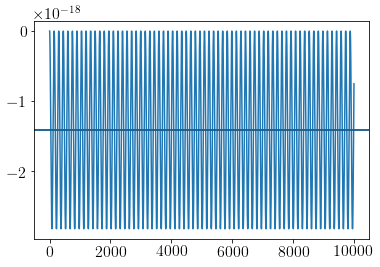

In [128]:
k_vec = 2*np.pi / 397e-9

beta = 0.5*(np.max( u_EMM[:,:3], axis=0) - np.min( u_EMM[:,:3], axis=0) ) * k_vec/Omega

v_EMM_2 = np.sum( u_EMM[:,:3]**2, axis=1 )

Delta_f_f_EMM = - v_EMM_2 / (2*c**2)

plt.plot(Delta_f_f_EMM)
plt.axhline(- (Omega/(2*c*k_vec))**2 * sum(beta**2) , color='black')
plt.axhline(np.mean(Delta_f_f_EMM))

EMM slozka taky sedi

vsechny dohromady:

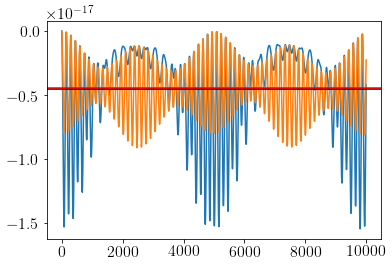

In [129]:
delta_f_f_without_cross = - (v_IMM_2 + v_EMM_2 + v_sec_2) / (2*c**2)
delta_f_f = - np.sum(u[:,:3]**2, axis=1) / (2*c**2)

plt.plot(delta_f_f)
plt.plot(delta_f_f_without_cross)
# plt.axhline(-5/2 * k_B*T / (m*c**2) - (Omega/(2*c*k_vec))**2 * sum(beta**2), color='black') 
plt.axhline(np.mean(delta_f_f), color='black')
plt.axhline(np.mean(delta_f_f_without_cross), color='red')

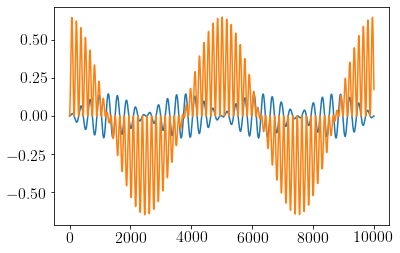

In [133]:
# plt.plot(v_sec_2 + v_IMM_2)
# plt.plot( np.sum( (u_sec[:,:3] + u_IMM[:,:3] )**2 , axis=1 ) )
N = np.shape(u_sec)[0]

dot_sec_IMM = np.zeros(N)
dot_sec_EMM = np.zeros(N)
dot_IMM_EMM = np.zeros(N)
for i in range(N):
    dot_sec_IMM[i] = np.dot( u_sec[i,:3], u_IMM[i,:3] )
    dot_sec_EMM[i] = np.dot( u_sec[i,:3], u_EMM[i,:3] )
    dot_IMM_EMM[i] = np.dot( u_IMM[i,:3], u_EMM[i,:3])
# plt.plot(dot_sec_IMM)
plt.plot(dot_sec_EMM)
plt.plot(dot_IMM_EMM)